In [1]:
from keras.layers import *
from keras import models
import medpy
import scipy
import os
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahil

In [2]:
os.getcwd()

'/home/rahil/image-Segmentation'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Upsampling.ipynb',
 'README.md',
 'augmentation.ipynb',
 '.git',
 'augmented_data',
 'segmentation models.ipynb',
 'Datasets',
 'Online augmentation.ipynb',
 'offline augmentation.ipynb']

In [4]:
os.chdir('/home/rahil/image-Segmentation/Datasets/')

In [5]:
os.getcwd()

'/home/rahil/image-Segmentation/Datasets'

In [6]:
os.listdir()

['Skin_ValidY.npy', 'Skin_ValidX.npy', 'Skin_TestX.npy', 'Skin_TestY.npy']

In [7]:
os.listdir()

['Skin_ValidY.npy', 'Skin_ValidX.npy', 'Skin_TestX.npy', 'Skin_TestY.npy']

In [8]:
x_train=np.load('Skin_ValidX.npy')
y_train=np.load('Skin_ValidY.npy')

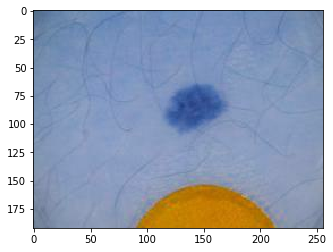

In [9]:
plt.imshow(x_train[0],cmap='gray')

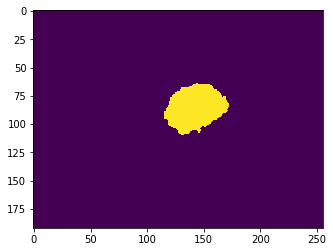

In [10]:
plt.imshow(y_train[0])

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_train.ndim)
print(y_train.ndim)

(150, 192, 256, 3)
(150, 192, 256)
4
3


In [12]:
#converting the image into gray image using cv2 functions
x_gray=[]
for i in range(0,x_train.shape[0]):
    x_gray.append(cv2.cvtColor(x_train[i],cv2.COLOR_BGR2GRAY))

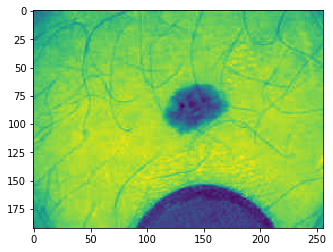

In [13]:
plt.imshow(x_gray[0])

In [14]:
x_train=np.array(x_gray)

In [15]:
x_train.shape

(150, 192, 256)

In [16]:
print(y_train.shape)

(150, 192, 256)


In [17]:
#doing the resizing of the image 
x_resize=[]
for i in range(0,x_train.shape[0]):
    x_resize.append(cv2.resize(x_train[i],(128,128))) 

In [18]:
x_resize[0].ndim

2

In [19]:
x_resize[0].shape

(128, 128)

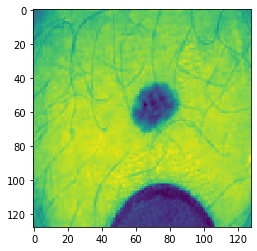

In [20]:
plt.imshow(x_resize[0])

In [21]:
#stroing the resized array into orignal image and freeing up the duplicate arrays
x_train=np.array(x_resize)
x_train.shape

(150, 128, 128)

In [22]:
#deleting the useless space occupied by numpy array
del x_gray
del x_resize

In [23]:
#changing the dimensions of the output images
y_resize=[]
for i in range(0,y_train.shape[0]):
    y_resize.append(cv2.resize(y_train[i],(128,128))) 

In [24]:
y_train=np.array(y_resize)

In [25]:
#deleting the extra space
del y_resize

In [26]:
print(y_train.shape)
print(x_train.shape)

(150, 128, 128)
(150, 128, 128)


In [27]:
#splitting and shuffing of the data
data,label=shuffle(x_train,y_train,random_state=2)

In [28]:
x_train , x_test , y_train , y_test =train_test_split(data , label ,test_size=0.2, random_state=2)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 128, 128)
(30, 128, 128)
(120, 128, 128)
(30, 128, 128)


In [30]:
#preprossing of training data before training the model
#reshaping the input into 3d form
x_train=x_train.reshape(-1,128,128,1)
y_train=y_train.reshape(-1,128,128,1)
x_test=x_test.reshape(-1,128,128,1)
y_test=y_test.reshape(-1,128,128,1)

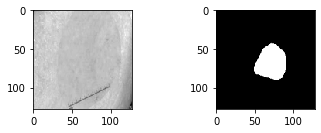

In [31]:
#before normalizing the data
plt.subplot(221)
plt.imshow(x_train[0].reshape(128,128),cmap='gray')
plt.subplot(222)
plt.imshow(y_train[0].reshape(128,128),cmap='gray')
plt.show()

In [32]:
#normalizing the data
x_train=x_train.astype('float32')/255
y_train=y_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_test=y_test.astype('float32')/255

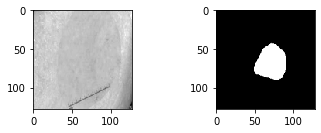

In [33]:
#after normalizing the data
plt.subplot(221)
plt.imshow(x_train[0].reshape(128,128),cmap='gray')
plt.subplot(222)
plt.imshow(y_train[0].reshape(128,128),cmap='gray')
plt.show()

In [34]:
#agian using normalizing method used in vgg 16 architecture
mean=np.mean(x_train)
std=np.std(x_train)
x_train=x_train-mean
x_train=x_train/std

In [35]:
mean=np.mean(x_test)
std=np.std(x_test)
x_test=x_test-mean
x_test=x_test/std

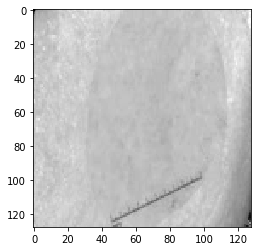

In [36]:
#visualizing data after normalization
plt.imshow(x_train[0].reshape(128,128),'gray')

In [60]:
#creating the model such that without using upsampling only we are using the convolution layers but with padding='same'
#hence there will be no reduction in image size in any layer
x_train[0].shape

(128, 128, 1)

In [38]:
model=models.Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu' , input_shape=(128,128,1), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu' ,padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu' ,padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=1, kernel_size=(1,1),activation='sigmoid' ,padding='same'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 1)       65        
Total params: 23,361
Trainable params: 23,361
Non-trainable params: 0
_________________________________________________________________


In [39]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [40]:
from keras.callbacks import EarlyStopping , ModelCheckpoint
es=EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=10)
cp=ModelCheckpoint('best_model1.h5' ,monitor='val_loss' ,mode='min',verbose=1,save_best_only='true')

In [41]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [46]:
history=model.fit(x_train,y_train,batch_size=20,epochs=50,callbacks=[es,cp],validation_split=0.2,verbose=1,shuffle='true')

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 7s 73ms/step - loss: 0.1042 - acc: 0.8581 - val_loss: 0.1232 - val_acc: 0.8349

Epoch 00001: val_loss improved from 0.12420 to 0.12323, saving model to best_model1.h5
Epoch 2/50
96/96 [==============================] - 8s 83ms/step - loss: 0.1075 - acc: 0.8508 - val_loss: 0.1221 - val_acc: 0.8339

Epoch 00002: val_loss improved from 0.12323 to 0.12213, saving model to best_model1.h5
Epoch 3/50
96/96 [==============================] - 8s 79ms/step - loss: 0.1039 - acc: 0.8575 - val_loss: 0.1281 - val_acc: 0.8259

Epoch 00003: val_loss did not improve from 0.12213
Epoch 4/50
96/96 [==============================] - 7s 76ms/step - loss: 0.1047 - acc: 0.8560 - val_loss: 0.1228 - val_acc: 0.8303

Epoch 00004: val_loss did not improve from 0.12213
Epoch 5/50
96/96 [==============================] - 8s 82ms/step - loss: 0.1056 - acc: 0.8541 - val_loss: 0.1204 - val_acc: 0.8375

Epoch 00005: val_los

96/96 [==============================] - 15s 154ms/step - loss: 0.1014 - acc: 0.8599 - val_loss: 0.1163 - val_acc: 0.8413

Epoch 00043: val_loss did not improve from 0.11492
Epoch 44/50
96/96 [==============================] - 13s 139ms/step - loss: 0.1003 - acc: 0.8616 - val_loss: 0.1183 - val_acc: 0.8299

Epoch 00044: val_loss did not improve from 0.11492
Epoch 45/50
96/96 [==============================] - 11s 116ms/step - loss: 0.1011 - acc: 0.8591 - val_loss: 0.1158 - val_acc: 0.8376

Epoch 00045: val_loss did not improve from 0.11492
Epoch 46/50
96/96 [==============================] - 9s 93ms/step - loss: 0.0986 - acc: 0.8639 - val_loss: 0.1163 - val_acc: 0.8351

Epoch 00046: val_loss did not improve from 0.11492
Epoch 47/50
96/96 [==============================] - 9s 92ms/step - loss: 0.0980 - acc: 0.8646 - val_loss: 0.1144 - val_acc: 0.8384

Epoch 00047: val_loss improved from 0.11492 to 0.11442, saving model to best_model1.h5
Epoch 48/50
96/96 [==============================]

In [47]:
#using the saved model which is saved with help of check point function
from keras.models import load_model
best_model=load_model('best_model1.h5')

In [48]:
#results on the tarined model
results=model.evaluate(x_test,y_test)
print('test_loss:,test:accuracy:',results)

30/30 [==============================] - 0s 10ms/step
test_loss:,test:accuracy: [0.07049386203289032, 0.9049011468887329]


In [49]:
#results on the best model
results1=best_model.evaluate(x_test,y_test)
print('test_loss,test_accracy',results1)

30/30 [==============================] - 0s 14ms/step
test_loss,test_accracy [0.07215025275945663, 0.904217541217804]


In [52]:
#plotting the graph
train_loss=history.history['loss']
train_acc=history.history['acc']
val_loss=history.history['val_loss']
val_acc=history.history['val_acc']
x_epoch=range(len(train_loss))

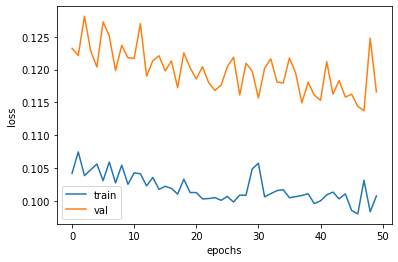

In [55]:
#plotting the graph for loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_epoch,train_loss)
plt.plot(x_epoch,val_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])

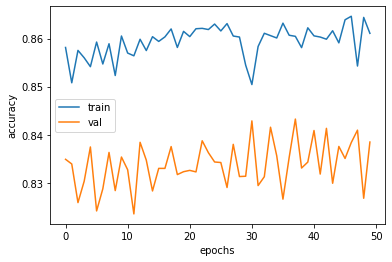

In [56]:
#plotting the graph for accuracy
plt.plot(x_epoch,train_acc)
plt.plot(x_epoch,val_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])

In [87]:
#prediction using our model
x_predict=np.reshape(x_test[10],(1,128,128,1))
print(x_predict.shape)
x_predict1=x_test[25]
#x_predict1.reshape(1,128,128,1)
#print(x_predict1.shape)

(1, 128, 128, 1)


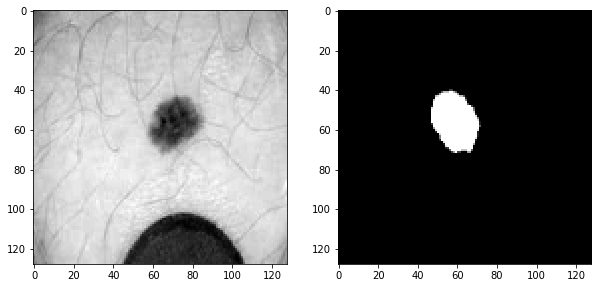

In [92]:
#figures which we are going to predict
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(x_predict.reshape(128,128),cmap='gray')
plt.subplot(122).imshow(y_test[20].reshape(128,128),cmap='gray')
plt.show()

In [89]:
y_predict=model.predict(x_predict)
y_predict.shape

(1, 128, 128, 1)

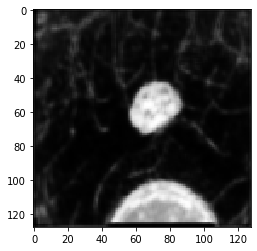

In [90]:
#image just produced by the model
plt.imshow(y_predict.reshape(128,128),cmap='gray')

the maximum value of the predicted image 0.75061107
the minimum value of the predicted image 0.006924987


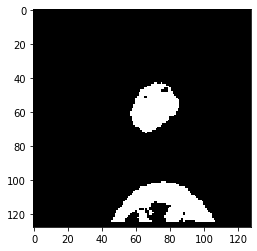

In [91]:
#now taking the part of image which is required by us using the thresholding segmentation method
#taking the threshold of 0.5
final_predict=y_predict >0.5
print("the maximum value of the predicted image",np.max(y_predict))
print("the minimum value of the predicted image",np.min(y_predict))
plt.imshow(final_predict.reshape(128,128),cmap='gray')

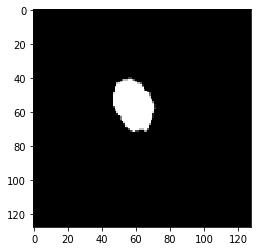

In [76]:
plt.imshow(y_test[20].reshape(128,128),cmap='gray')

Text(0.5, 0, 'output of model')

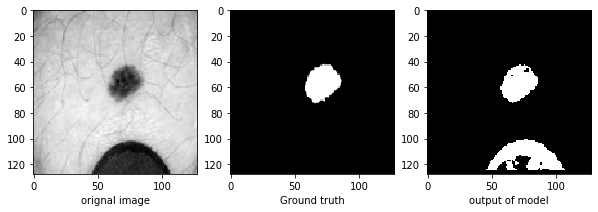

In [94]:
#finally the mixup of all images
plt.figure(figsize=(10,10))
plt.subplot(131).imshow(x_predict.reshape(128,128),cmap='gray')
plt.xlabel('orignal image')
plt.subplot(132).imshow(y_test[10].reshape(128,128),cmap='gray')
plt.xlabel('Ground truth')
plt.subplot(133).imshow(final_predict.reshape(128,128),cmap='gray')
plt.xlabel('output of model')